___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
**Import Pandas, NumPy, Matplotlib and Seaborn. Then set %matplotlib inline**

You can import sklearn as you need it.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# This makes sure that graphics render in your notebook
%matplotlib inline

plt.style.use('ggplot')

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their Color Avatar. 

It also has the numerical predictor float variables listed below:

* **Avg. Session Length**: Average session of in-store styling advice sessions.
* **Time on App**: Average time spent on App in minutes
* **Time on Website**: Average time spent on Website in minutes
* **Length of Membership**: How many years the customer has been a member. 

The target variable is **Yearly Amount Spent** (we can ignore the string columns).

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv('EcommerceCustomers.csv')

**Check the head of customers, and check out its `info()` and `describe()` methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# Average length of membership is 3.5 years
# Average yearly amount spent is approx $500
# Average session length is 33 mins
# Average time on app vs time on website is 12 vs 37 mins - a lot more time spent on website 

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
# 500 rows, 8 columns
# No null values in dataset

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we will only concentrate on the numerical data.
___
**Use Seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

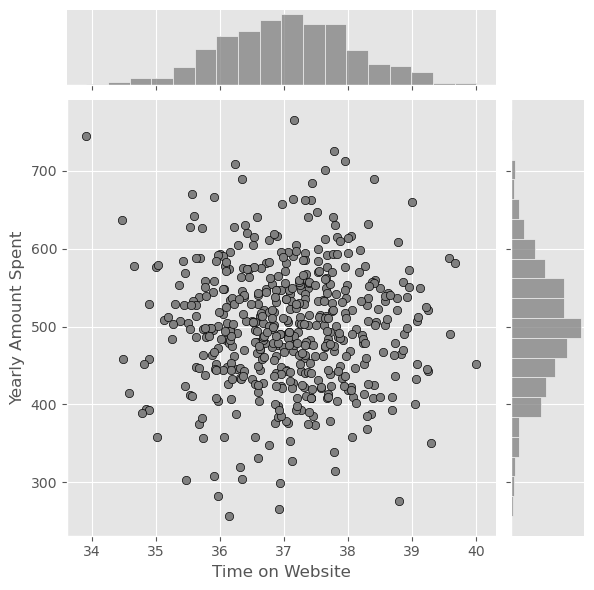

In [9]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, color='grey', joint_kws={'edgecolor':'black'});

In [10]:
# There does not seem to be any trend between time on website and yearly spendings
# Both distributions are normal, peaking at 37 mins and $500 

**Do the same again but with the Time on App column instead.**

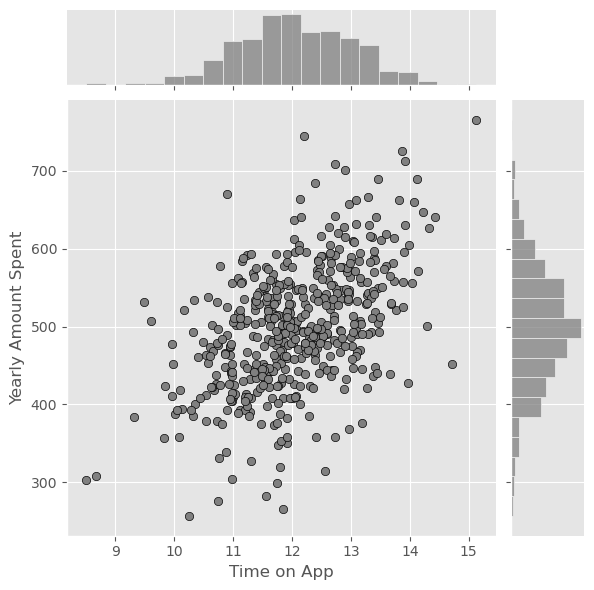

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, color='grey', joint_kws={'edgecolor':'black'});

In [12]:
# There is more of a linear relationship between time on app and yearly spendings
# The distribution of time on app is a little less normal, but peaks at average of 12 minutes
# The distribution of money spent peaks at an average of $500 per year

**Use jointplot to create a 2D hexbin plot comparing Time on App and Length of Membership.**

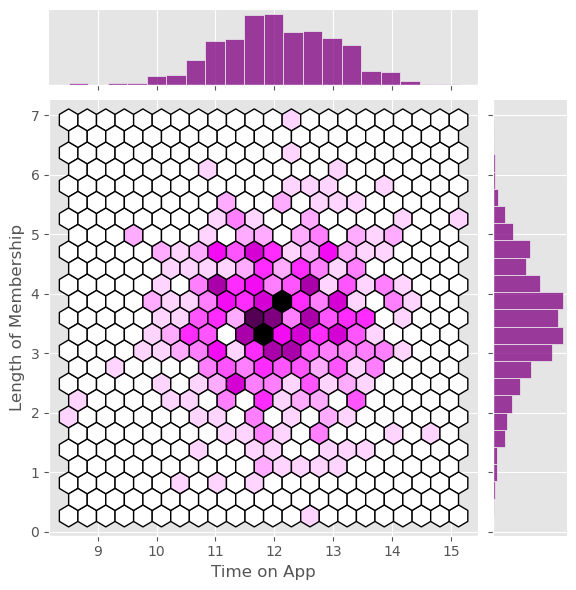

In [13]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex', color='purple', joint_kws={'edgecolor':'black'});

In [14]:
# The majority of data points fall around spending an average of 12 mins on app, with average of 3-3.5 years membership

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

Don't worry about the the colors

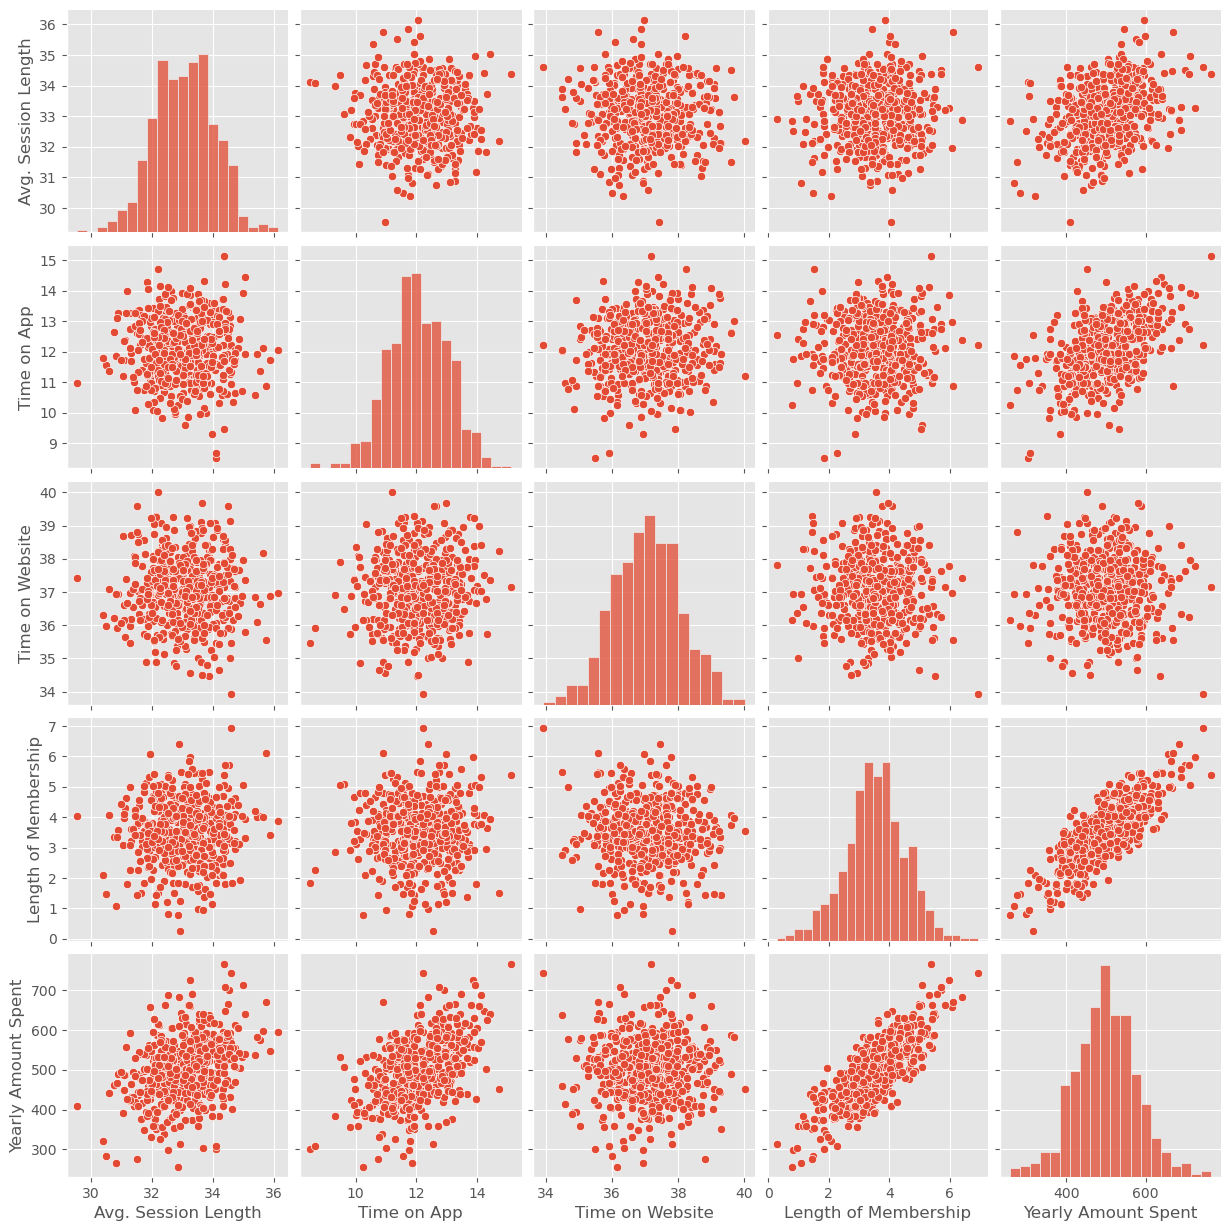

In [15]:
sns.pairplot(customers);

In [17]:
# Strong linear relationship between Length of Membership and Yearly Amount Spent
# Slight linear relationship between Time on App and Yearly Amount Spent
# All other numerical features have no trend with target variable

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of Membership

Confirm with heatmap of correlation coefficients:

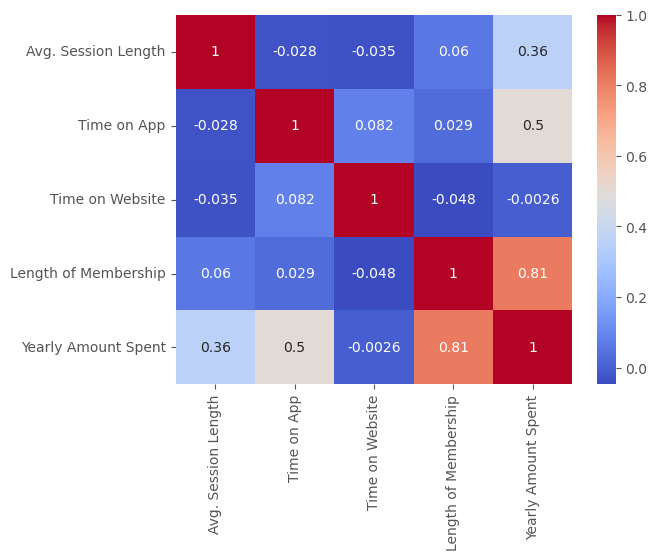

In [16]:
sns.heatmap(customers.corr(), annot=True, cmap='coolwarm');

In [285]:
# Length of Membership and Yearly Amount Spent are strongly correlated (0.81)

**Create a linear model plot (using Seaborn's `lmplot`) of  Yearly Amount Spent vs. Length of Membership.**

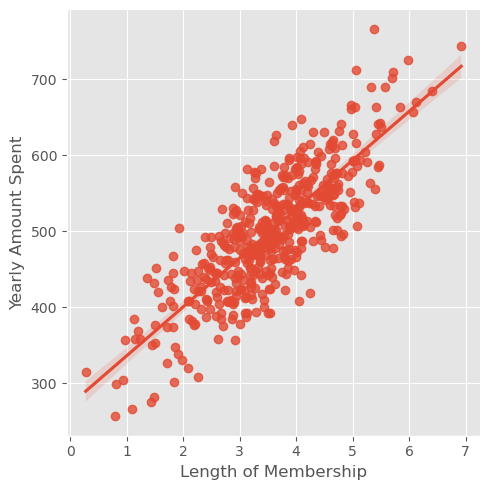

In [20]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers);

In [ ]:
# There is a good fit between data points and regression line - little room for error
# The longer the membership, the more money spent per year

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [39]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [19]:
y = customers['Yearly Amount Spent']

**Use `model_selection.train_test_split` from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from `sklearn.linear_model`**

In [22]:
from sklearn.linear_model import LinearRegression

**Create an instance of a `LinearRegression()` model named lm.**

In [23]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [26]:
print('Coefficients:', lm.coef_)

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use `lm.predict()` to predict off the X_test set of the data.**

In [27]:
y_pred = lm.predict(X_test)

In [28]:
y_pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

**Create a scatterplot of the real test values versus the predicted values.**

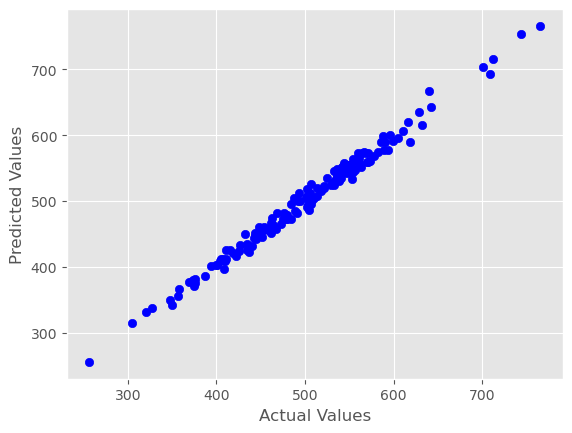

In [31]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

In [ ]:
# Incredibly close fit based on input features!

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


In [ ]:
# Average error of approx $7 in yearly spendings
# Average squared error of approx $80 in yearly spendings
# Average 'weighted' error of approx $9 in yearly spendings

In [43]:
# R-Squared value

print('R-Squared:', metrics.explained_variance_score(y_test, y_pred))

R-Squared: 0.9890771231889607


In [ ]:
# Model explains approx 99% of the total variation - very good!

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either Seaborn displot, or just use `plt.hist()`.**

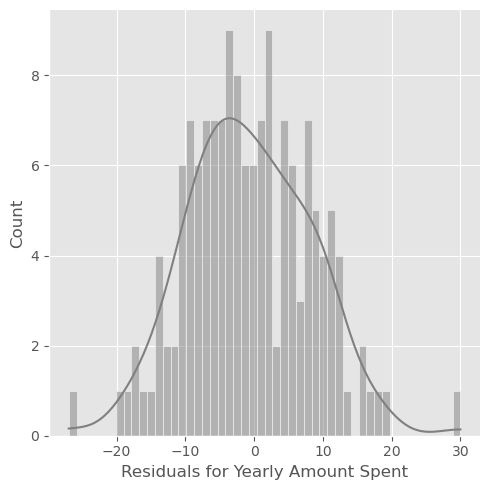

In [38]:
sns.displot((y_test - y_pred), bins=50, color='grey', kde=True)
plt.xlabel('Residuals for Yearly Amount Spent');

In [ ]:
# Distribution of residuals from prediction is fairly normal which indicates a good model fit

## Conclusion
We still want to figure out the answer to the original question: 

**Do we focus our efforts on mobile app or website development?** 

Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [40]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])

In [41]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can you interpret these coefficients?**

- Holding all other features as fixed, 1-unit increase in **Avg. Session Length** is associated with an **increase of 26** in Yearly Amount Spent.
- Holding all other features as fixed, 1-unit increase in **Time on App** is associated with an **increase of 38.6** in Yearly Amount Spent.
- Holding all other features as fixed, 1-unit increase in **Time on Website** is associated with an **increase of 0.2** in Yearly Amount Spent.
- Holding all other features as fixed, 1-unit increase in **Length of Membership** is associated with an **increase of 61.3** in Yearly Amount Spent.

In [ ]:
# Length of Membership has the biggest impact on predictive maths, due to largest coefficient value, followed by:
# Time on App
# Average Session Length
# Time on Website

**Do you think the company should focus more on their mobile app or on their website?**

If more time is spent on the website, it could encourage more expenditure and catch up with the App. On the other hand, more time spent on the app, which is already working, could bring in more membership. 

Efforts should be made to increase the length of membership so more exploration around the effects of time on app and website vs length of membership is important. Who is the demographic your company wants to attract? What is the most popular way to look at clothes? How effective are the sessions? etc.

Most importantly, how much is it going to cost improving the app vs improving the website...remember that all business choices have a cost associated.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.